# Noise PSD Generation

**In the notebook, we demonstrate how to produce noise PSD from continuous data and save in a "filter" file used for the trigger and feature processing**



In [2]:
# import Noise class from detprocess
from detprocess import Noise

### Instantiate detprocess noise object

In [3]:
noise = Noise(verbose=True)

### Set or generate   random events from continuous data

Three ways of getting random events used to calculate noise PSD:
  1. generate randoms from continuous data
  2. set "randoms" vaex dataframe (produced by the processing or generated by Random object). Vaex dataframe can be either dataframe directly or full path to hdf5 file
  3. set randoms based on a list of events metadata. The list should follow format of detanalys.analyzer.get_event_list() function.

In [4]:
# continuous data directory, use argument "series" for list of series within continuous data directory
continuous_data = '/sdata1/runs/run20/raw/continuous_I2_D20220913_T134952'

# 1.  Generate randoms
#  use either "random_rate" or nevents
noise.generate_randoms(continuous_data, nevents=1000, ncores=4)

# 2. set randoms from vaex dataframe
#noise.set_randoms(continuous_data, dataframe='/path/to/vaex/hdf5')


INFO: Found total of 312 raw data file(s) from 24 different series number!
INFO: Found total of 312 files from 24 different series number!
INFO: Processing with be split between 4 cores!
INFO node #1: Acquiring randoms for series I2_D20220913_T134953INFO node #3: Acquiring randoms for series I2_D20220913_T195146INFO node #2: Acquiring randoms for series I2_D20220913_T165048INFO node #4: Acquiring randoms for series I2_D20220913_T225241



INFO node #1: Randoms acquisition for I2_D20220913_T134953 done! Final rate = 0.03 Hz
INFO node #1: Acquiring randoms for series I2_D20220913_T142003
INFO node #2: Randoms acquisition for I2_D20220913_T165048 done! Final rate = 0.03 Hz
INFO node #2: Acquiring randoms for series I2_D20220913_T172057
INFO node #4: Randoms acquisition for I2_D20220913_T225241 done! Final rate = 0.03 Hz
INFO node #4: Acquiring randoms for series I2_D20220913_T232250
INFO node #3: Randoms acquisition for I2_D20220913_T195146 done! Final rate = 0.03 Hz
INFO node #3: Acquiri

### Calculate PSD for each channels

In [5]:
# let's calculate PSD.
# We need to specify trace length and pretrigger length (either in "samples" or "msec") 
# nevents used for calculation can be smaller than the genererate randoms
# a tag can be specified with argument "tag"

noise.calc_psd(['IrPtTESSmall','IrPtTESBig', 'IrPtTESSmall+IrPtTESBig'], 
               trace_length_msec=20, 
               pretrigger_length_msec=10,
               nevents=900)

INFO: Processing PSD for channel IrPtTESSmall
INFO: Loading 900 events for channel(s) IrPtTESSmall
INFO: Number of events after cuts = 343, efficiency = 38.11%
INFO: Processing PSD for channel IrPtTESBig
INFO: Loading 900 events for channel(s) IrPtTESBig
INFO: Number of events after cuts = 268, efficiency = 29.78%
INFO: Processing PSD for channel IrPtTESSmall+IrPtTESBig
INFO: Number of events after cuts = 282, efficiency = 31.33%


### Plot PSD(s)

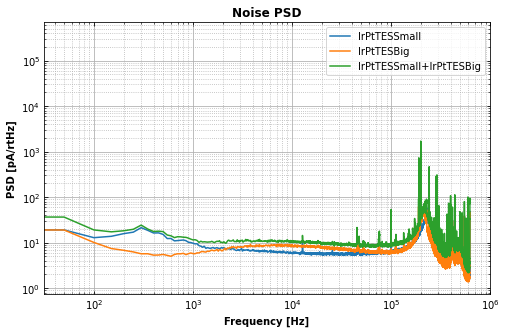

In [6]:
noise.plot_psd(['IrPtTESSmall', 'IrPtTESBig', 'IrPtTESSmall+IrPtTESBig'], fold=True)

### Save filter file

In [7]:
# filter file can be loaded /saved using noise object
# use overwrite=True is psd with same tag already exist
file_name = './test_filter.hdf5'
noise.save_hdf5(file_name, overwrite=False)

INFO: Saving noise data to file ./test_filter.hdf5
Storing /IrPtTESSmall/psd_default in ./test_filter.hdf5
Storing /IrPtTESSmall/psd_fold_default in ./test_filter.hdf5
Storing /IrPtTESBig/psd_default in ./test_filter.hdf5
Storing /IrPtTESBig/psd_fold_default in ./test_filter.hdf5
Storing /IrPtTESSmall+IrPtTESBig/psd_default in ./test_filter.hdf5
Storing /IrPtTESSmall+IrPtTESBig/psd_fold_default in ./test_filter.hdf5


In [8]:
# filter file can be also loaded. 
noise.load_hdf5('./test_filter.hdf5')
noise.describe()

INFO: Loading filter data from file ./test_filter.hdf5

Channel IrPtTESSmall:
 * Tag "default":
    psd: pandas.Series (25000,)
    psd_fold: pandas.Series (12501,)

Channel IrPtTESBig:
 * Tag "default":
    psd: pandas.Series (25000,)
    psd_fold: pandas.Series (12501,)

Channel IrPtTESSmall+IrPtTESBig:
 * Tag "default":
    psd: pandas.Series (25000,)
    psd_fold: pandas.Series (12501,)
